## Credit Card Fraud Detection 

### Setting up Environment


Installing and important required libraries and modules

In [1]:
!pip install imbalanced-learn

In [2]:
!pip install seaborn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset

Dataset can be downloaded here https://www.kaggle.com/isaikumar/creditcardfraud#__sid=js0
    
Dataset used is an highly imbalanced dataset thus we undersample to overcome this problem.

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df.isnull().values.any() #Checking if any value is null

False

In [9]:
Fraud = df[df["Class"]==1]
#print(Fraud)
Fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [10]:
NFraud = df[df["Class"]==0]
NFraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
Fraud.shape


(492, 31)

In [12]:
NFraud.shape

(284315, 31)

In [13]:
Fraud.Amount.describe(
)

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
NFraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

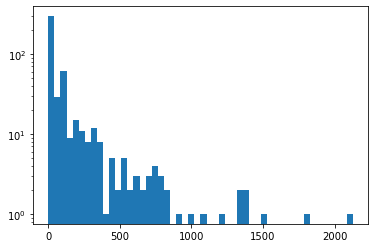

In [15]:
plt.hist(Fraud.Amount, bins = 50)
plt.yscale('log')

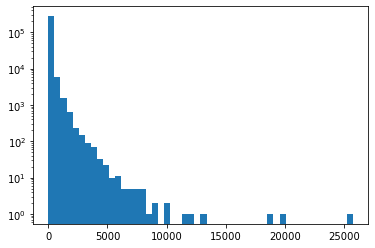

In [16]:
plt.hist(NFraud.Amount, bins = 50)
plt.yscale('log')

#### Diving dependent and independent features

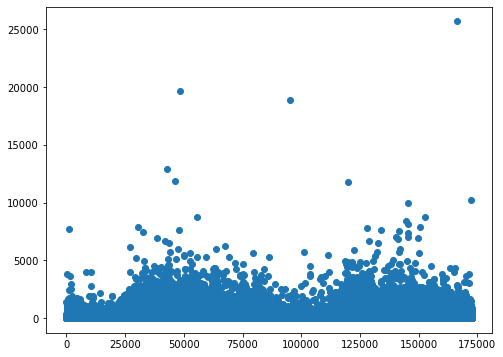

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(NFraud.Time,NFraud.Amount)


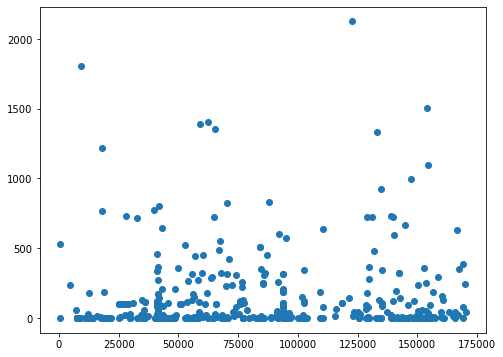

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(Fraud.Time,Fraud.Amount)

In [19]:
X = df.drop("Class", axis = 1)
y = df.Class


In [20]:
X.head(50)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### In Imbalance dataset question the accuracy, as accuracy in itself can be very high

## Let's first try with Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [23]:
log_reg = LogisticRegression()

*Trying out a range of hyperparameters in logistics regression. --> Hyperparameter tuning*

In [24]:
grid ={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv1 = KFold(n_splits = 5, random_state = None, shuffle = False)

#### Splitting the data into training and test data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [26]:
clf = GridSearchCV(log_reg,grid, cv = cv1, n_jobs = -1, scoring = 'f1_macro')
#
clf.fit(X_train,y_train)

C:\Users\acer\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [27]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
#
print(classification_report(y_test,y_pred))

[[85248    46]
 [   45   104]]
0.998934962489613
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.69      0.70      0.70       149

    accuracy                           1.00     85443
   macro avg       0.85      0.85      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [28]:
#Fraud.shape

## Data Preprocessing

**Scaling the data**

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
std_scalar = StandardScaler()

In [31]:
df['scaled_amount'] = std_scalar.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scalar.fit_transform(df['Time'].values.reshape(-1,1))

In [32]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350151,1.641931
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254117,1.641952
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839,1.641974
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313249,1.641974


In [33]:
df.drop(['Time','Amount'], axis = 1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


### Undersampling

In [34]:
n_fraud = len(df[df['Class']==1])
print(n_fraud)

492


In [35]:
fraud_indices =np.array(df[df["Class"]==1].index)
print(fraud_indices)

[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  43773  44001  44091  44223  44270
  4455

In [36]:
nonfraud_indices =np.array(df[df["Class"]==0].index)


In [37]:
random_nonfraud_indices = np.array(np.random.choice(nonfraud_indices, n_fraud,replace=False))

In [38]:
random_nonfraud_indices.shape

(492,)

In [39]:
undersample_indices = np.concatenate([fraud_indices, random_nonfraud_indices])

In [40]:
undersample_data = df.iloc[undersample_indices,:]
undersample_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229,-1.988034
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758,-1.986644
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031,-1.902623
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342,-1.849472
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231,-1.838248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217732,0.046152,0.954311,0.319916,-0.595001,0.498469,-1.097286,1.100765,-0.276019,-0.224412,-0.447176,...,-0.472935,0.058594,0.071544,-0.450273,0.133744,0.254643,0.100023,0,-0.335438,0.972753
123137,-0.416285,0.588658,1.185738,-2.091479,0.033349,-1.322596,1.001690,-0.247473,0.724273,-0.949287,...,0.615876,-0.270214,0.511572,-0.020916,-0.865917,0.228222,-0.024121,0,-0.349231,-0.378808
203152,1.934916,-0.023419,-1.770852,1.239018,0.515226,-0.647756,0.514927,-0.202949,0.115855,0.439996,...,0.322043,-0.075943,-0.416175,0.423085,-0.487159,-0.032788,-0.071140,0,-0.167318,0.839456
19503,-0.539354,-1.059222,2.164068,-2.373424,-1.363223,-0.039538,-0.092131,-0.102154,-1.885940,0.782503,...,0.308438,0.285255,0.022459,-0.408406,-0.405860,-0.048838,-0.076726,0,0.246164,-1.357812


##### We have to shuffle the data

In [41]:
undersample_data = undersample_data.sample(frac=1)
undersample_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
62771,1.285355,-0.880315,1.441406,-0.677473,-1.886695,-0.333316,-1.467587,0.214530,-0.334148,0.771333,...,1.306576,-0.063637,0.571620,0.230514,-0.070982,0.048505,0.024368,0,-0.289300,-0.934843
30962,0.972148,-0.168265,1.368632,2.879397,-1.037652,0.205693,-0.567965,0.282546,0.550758,0.459907,...,-0.582610,0.024544,0.322968,0.219771,-0.091708,0.014453,0.042157,0,-0.049095,-1.235234
26802,0.539276,1.554890,-2.066180,3.241617,0.184736,0.028330,-1.515521,0.537035,-1.999846,-2.133176,...,0.111955,-0.305225,-1.053835,0.771175,0.240878,0.418435,0.232170,1,-0.277186,-1.275223
250623,-0.531838,1.293022,-0.208075,-0.623549,0.123035,-1.051595,0.672289,0.236724,-0.072173,-0.348591,...,-0.566140,0.126251,-0.085134,-0.408364,0.153717,0.238849,0.088812,0,-0.313289,1.267374
163893,1.446690,-0.957660,-2.462254,0.159007,1.183474,1.673550,-0.012252,0.429520,1.114410,-1.125209,...,-0.324024,0.049605,-1.497824,-0.358441,0.030871,0.010441,0.002550,0,0.626302,0.452222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42741,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,-13.215172,...,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,1,1.482172,-1.128428
9179,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,...,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1,-0.349231,-1.720177
44716,-0.582831,0.824734,1.541425,0.532502,0.314898,-0.100796,0.817661,0.117030,-0.983398,-0.307376,...,0.095742,0.099727,0.186223,-0.417748,-0.632304,0.145079,0.149075,0,-0.153365,-1.110950
143333,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,-8.409665,...,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,1,-0.353229,-0.200658


In [42]:
X = undersample_data.drop(["Class"],axis=1)
y = undersample_data["Class"]


**Extracting X and y original dataset**

In [43]:
X_origin = df.drop(["Class"],axis=1)
y_origin = df["Class"]

### Splitting into training and test data 

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [45]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))
print('Number of total data:', len(X_test)+ len(X_train))

Number of training data: 688
Number of test data: 296
Number of total data: 984


### Learning 

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score, precision_score, classification_report
#from sklearn.model_selection import KFold
#from sklearn.model_selection import GridSearchCV

In [47]:
lr = LogisticRegression(C = 0.1, penalty = 'l2')
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [48]:
print('Train with Logistic Regression Classifier:')
print('Accuracy:', accuracy_score(y_train,y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))

Train with Logistic Regression Classifier:
Accuracy: 0.9491279069767442
Recall: 0.9090909090909091
Precision: 0.9872611464968153


In [49]:
print('Test with Logistic Regression Classifier:')
print('Accuracy:', accuracy_score(y_test,y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))

Test with Logistic Regression Classifier:
Accuracy: 0.9358108108108109
Recall: 0.8741721854304636
Precision: 1.0


In [50]:
print('Confusion Matrix:', confusion_matrix(y_test,y_test_pred))

Confusion Matrix: [[145   0]
 [ 19 132]]


In [51]:
X_org_train, X_org_test, y_org_train, y_org_test = train_test_split(X_origin,y_origin,train_size=0.7)

**On Original Imbalanced Data**

In [52]:
lr2 = LogisticRegression(C = 0.1, penalty = 'l2')
lr2.fit(X_org_train, y_org_train)
y_org_train_pred = lr.predict(X_org_train)
y_org_test_pred = lr.predict(X_org_test)

In [53]:
print('Test with Logistic Regression Classifier on Original Imbalanced Data:')
print('Accuracy:', accuracy_score(y_org_test,y_org_test_pred))
print('Recall:', recall_score(y_org_test, y_org_test_pred))
print('Precision:', precision_score(y_org_test, y_org_test_pred))

Test with Logistic Regression Classifier on Original Imbalanced Data:
Accuracy: 0.9810633989911403
Recall: 0.9161676646706587
Precision: 0.08708025042686397


In [54]:
print('Confusion Matrix:', confusion_matrix(y_org_test,y_org_test_pred))

Confusion Matrix: [[83672  1604]
 [   14   153]]


Precision : Out of the total frauds predicted, how many are actually frauds?

Recall : What percentage of frauds are identified?

## Using Support Vector Machine:  

In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

In [57]:
print('Train with SVM Classifier:')
print('Accuracy:', accuracy_score(y_train,y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))

Train with SVM Classifier:
Accuracy: 0.938953488372093
Recall: 0.8885630498533724
Precision: 0.9869706840390879


In [58]:
print('Confusion Matrix:', confusion_matrix(y_train,y_train_pred))

Confusion Matrix: [[343   4]
 [ 38 303]]


In [59]:
print('Test with SVM classifier:')
print('Accuracy:', accuracy_score(y_test,y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))

Test with SVM classifier:
Accuracy: 0.9155405405405406
Recall: 0.8344370860927153
Precision: 1.0


In [65]:
print('Confusion Matrix:', confusion_matrix(y_test,y_test_pred))

Confusion Matrix: [[145   0]
 [ 25 126]]


**On Original Imbalanced Data**

In [61]:
lr2 = SVC()
lr2.fit(X_org_train, y_org_train)
y_org_train_pred = lr.predict(X_org_train)
y_org_test_pred = lr.predict(X_org_test)

In [62]:
print('Test with SVM classifier on original imbalanced data:')
print('Accuracy:', accuracy_score(y_org_test,y_org_test_pred))
print('Recall:', recall_score(y_org_test, y_org_test_pred))
print('Precision:', precision_score(y_org_test, y_org_test_pred))

Test with SVM classifier on original imbalanced data:
Accuracy: 0.9810633989911403
Recall: 0.9161676646706587
Precision: 0.08708025042686397


In [63]:
print('Confusion Matrix:', confusion_matrix(y_org_test,y_org_test_pred))

Confusion Matrix: [[83672  1604]
 [   14   153]]
